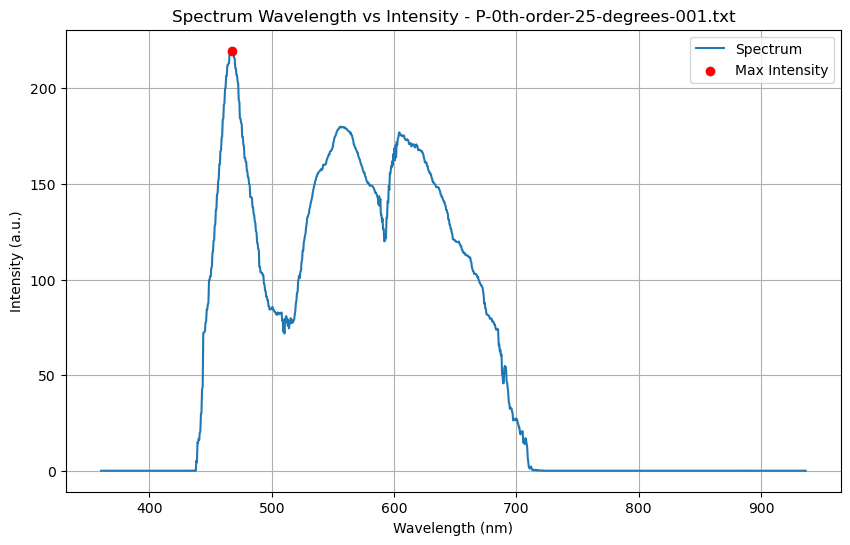

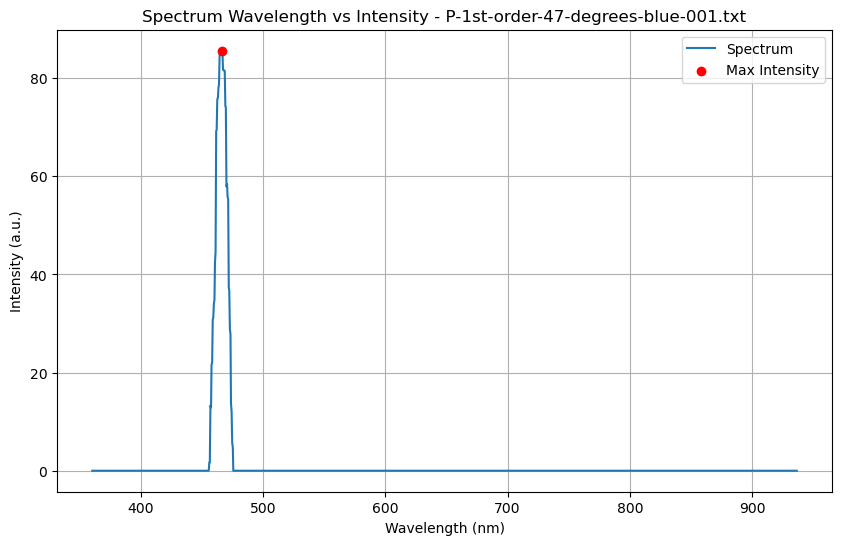

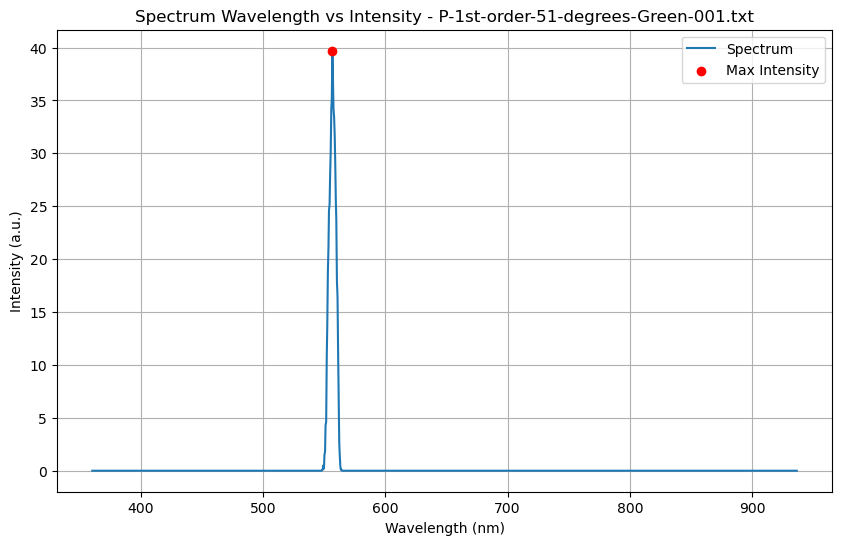

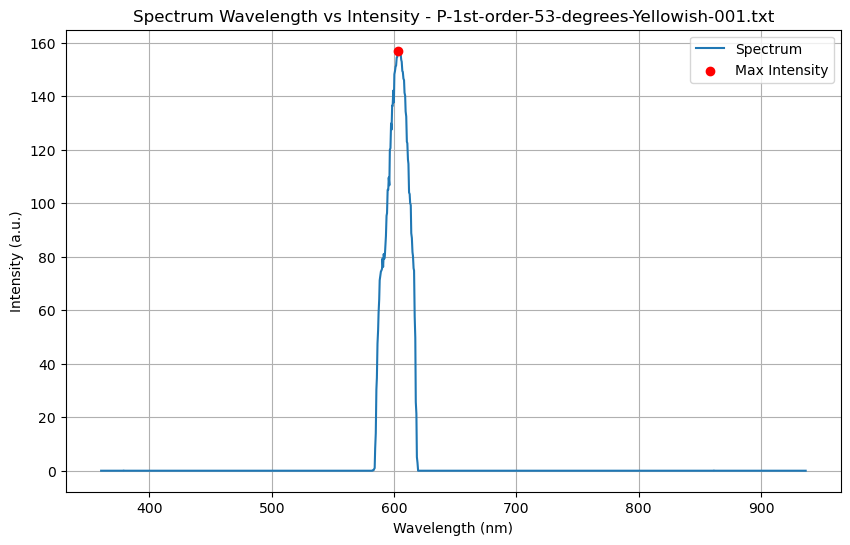

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to read data from the file
def read_data(filename):
    wavelength = []
    intensity = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('===START==='):
                break
        for line in file:
            if line.strip() and not line.startswith('===END==='):
                wl, intens = map(float, line.split())
                wavelength.append(wl)
                intensity.append(intens)
    return np.array(wavelength), np.array(intensity)

# Function to find wavelengths with maximum intensity
def find_max_intensity(wavelength, intensity):
    max_intensity = np.max(intensity)
    max_index = np.argmax(intensity)
    max_wavelength = wavelength[max_index]
    return max_wavelength, max_intensity

# Plotting the data
def plot_spectrum(wavelength, intensity, max_wavelength, max_intensity, filename):
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, intensity, label='Spectrum')
    plt.scatter(max_wavelength, max_intensity, color='red', label='Max Intensity', zorder=5)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity (a.u.)')
    plt.title(f'Spectrum Wavelength vs Intensity - {filename}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function
def main():
    # filepath = r'D:\OneDrive - University of Eastern Finland\classes\Photonics Laboratory\1 Kinegram\exp_data\\'
    filepath = r'C:\Users\frnegasa\OneDrive - University of Eastern Finland\classes\Photonics Laboratory\1 Kinegram\exp_data'
    filenames = [
        'P-0th-order-25-degrees-001.txt',
        'P-1st-order-47-degrees-blue-001.txt', 
        'P-1st-order-51-degrees-Green-001.txt',
        'P-1st-order-53-degrees-Yellowish-001.txt'
    ]

    for filename in filenames:
        full_path = os.path.join(filepath, filename)
        wavelength, intensity = read_data(full_path)
        max_wavelength, max_intensity = find_max_intensity(wavelength, intensity)
        plot_spectrum(wavelength, intensity, max_wavelength, max_intensity, filename)

if __name__ == "__main__":
    main()


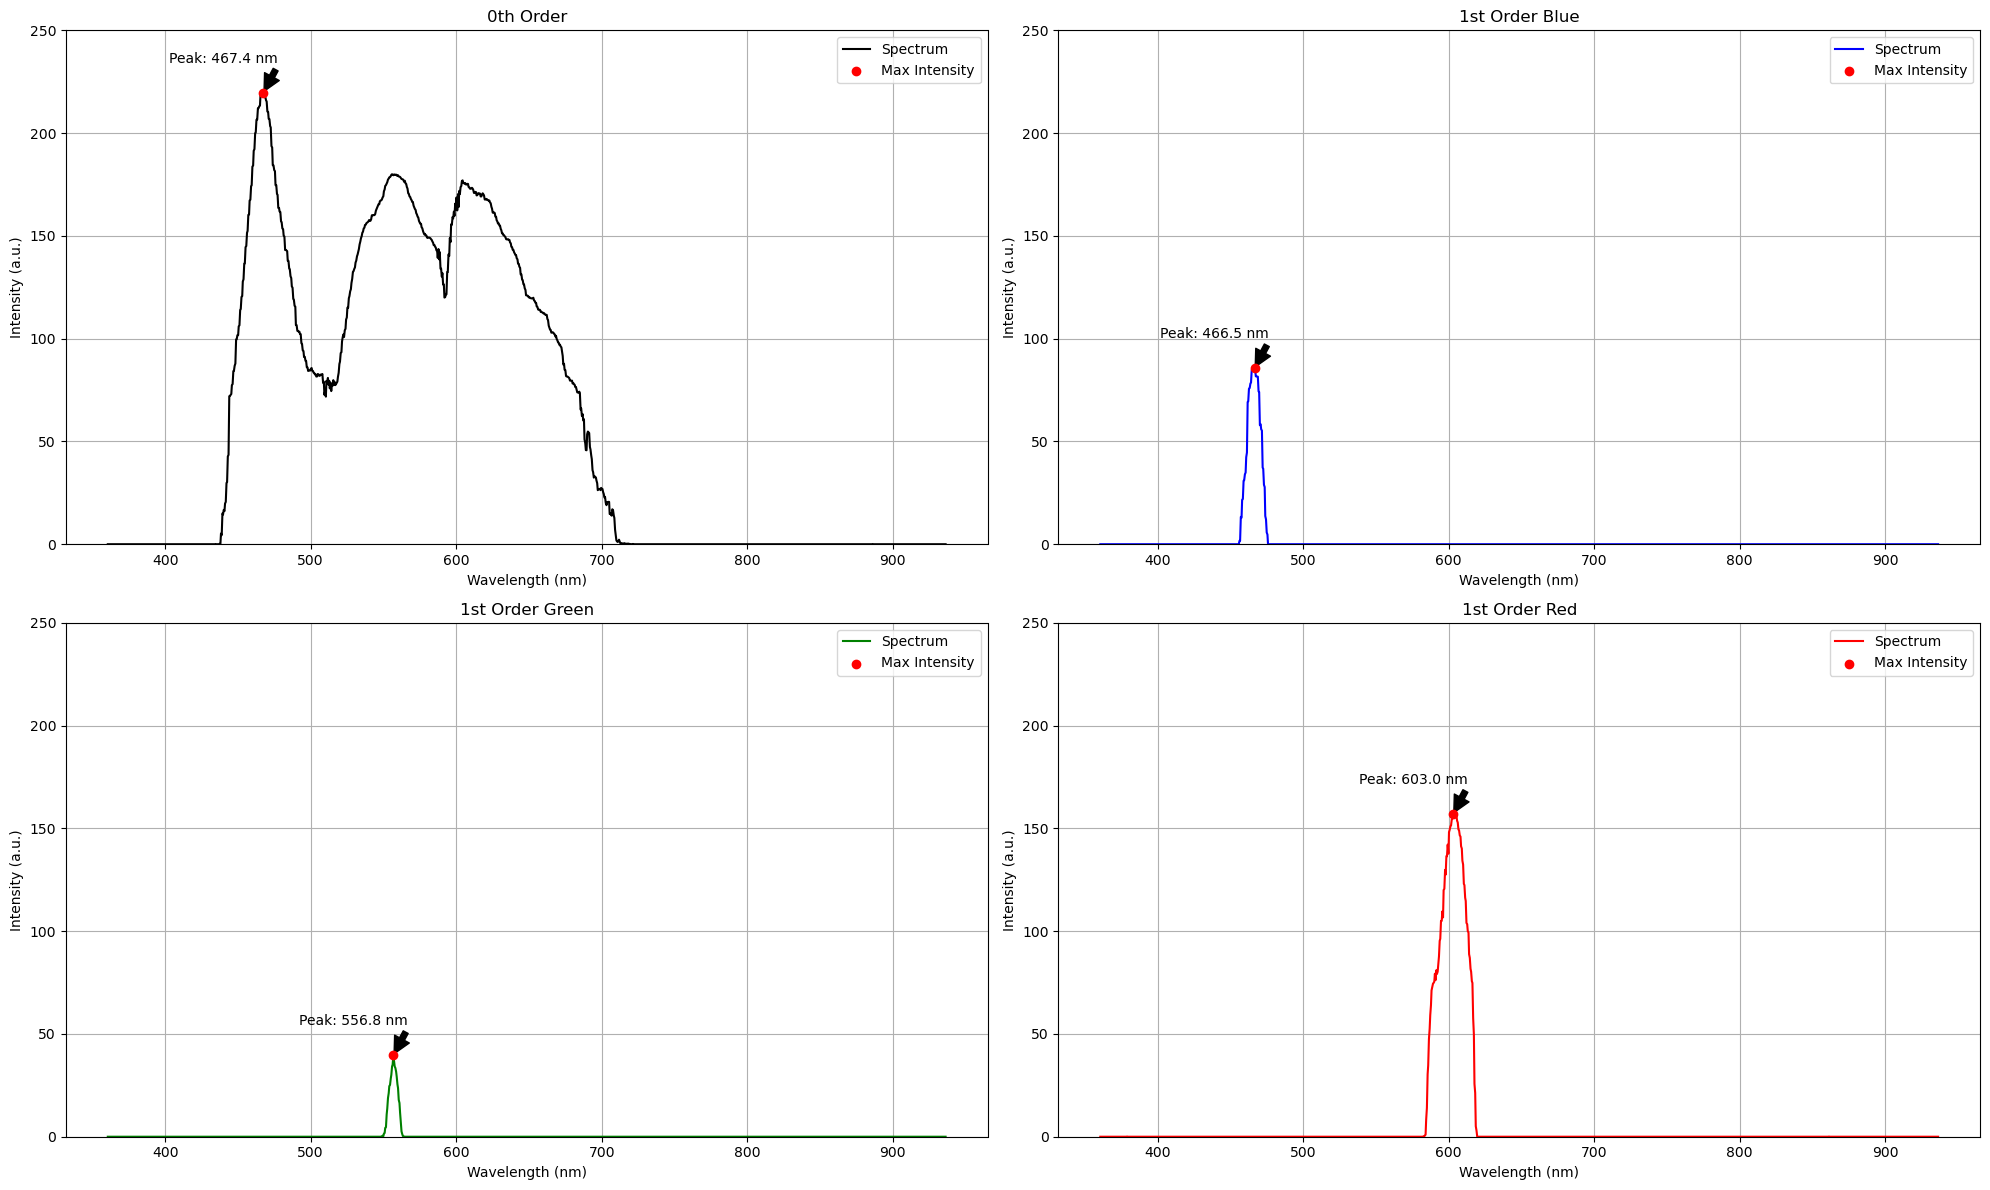

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Function definitions (read_data and find_max_intensity) remain the same

# Updated plotting function for subplots with color matching and fixed y-axis range
def plot_spectrum_subplot(ax, wavelength, intensity, max_wavelength, max_intensity, title, color):
    ax.plot(wavelength, intensity, label='Spectrum', color=color)
    ax.scatter(max_wavelength, max_intensity, color='red', label='Max Intensity', zorder=5)
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity (a.u.)')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 250)  # Setting the y-axis range from 0 to 200
    
    # Adding text annotation for the peak wavelength
    ax.annotate(f'Peak: {max_wavelength} nm', 
                xy=(max_wavelength, max_intensity), 
                xytext=(max_wavelength+10, max_intensity+20),  # Adjusted to be within the new y-axis range
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='right', verticalalignment='top')

# Main function with color matching and fixed y-axis range
def main():
    filepath = r'C:\Users\frnegasa\OneDrive - University of Eastern Finland\classes\Photonics Laboratory\1 Kinegram\exp_data\\'
    filenames = [
        'P-0th-order-25-degrees-001.txt',
        'P-1st-order-47-degrees-blue-001.txt',
        'P-1st-order-51-degrees-Green-001.txt',
        'P-1st-order-53-degrees-Yellowish-001.txt'
    ]
    titles = ['0th Order', '1st Order Blue', '1st Order Green', '1st Order Red']
    colors = ['black', 'blue', 'green', 'red']  # Color for each subplot

    # Creating a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(20, 12))
    axs = axs.flatten()

    for i, (filename, title, color) in enumerate(zip(filenames, titles, colors)):
        full_path = os.path.join(filepath, filename)
        wavelength, intensity = read_data(full_path)
        max_wavelength, max_intensity = find_max_intensity(wavelength, intensity)
        plot_spectrum_subplot(axs[i], wavelength, intensity, max_wavelength, max_intensity, title, color)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


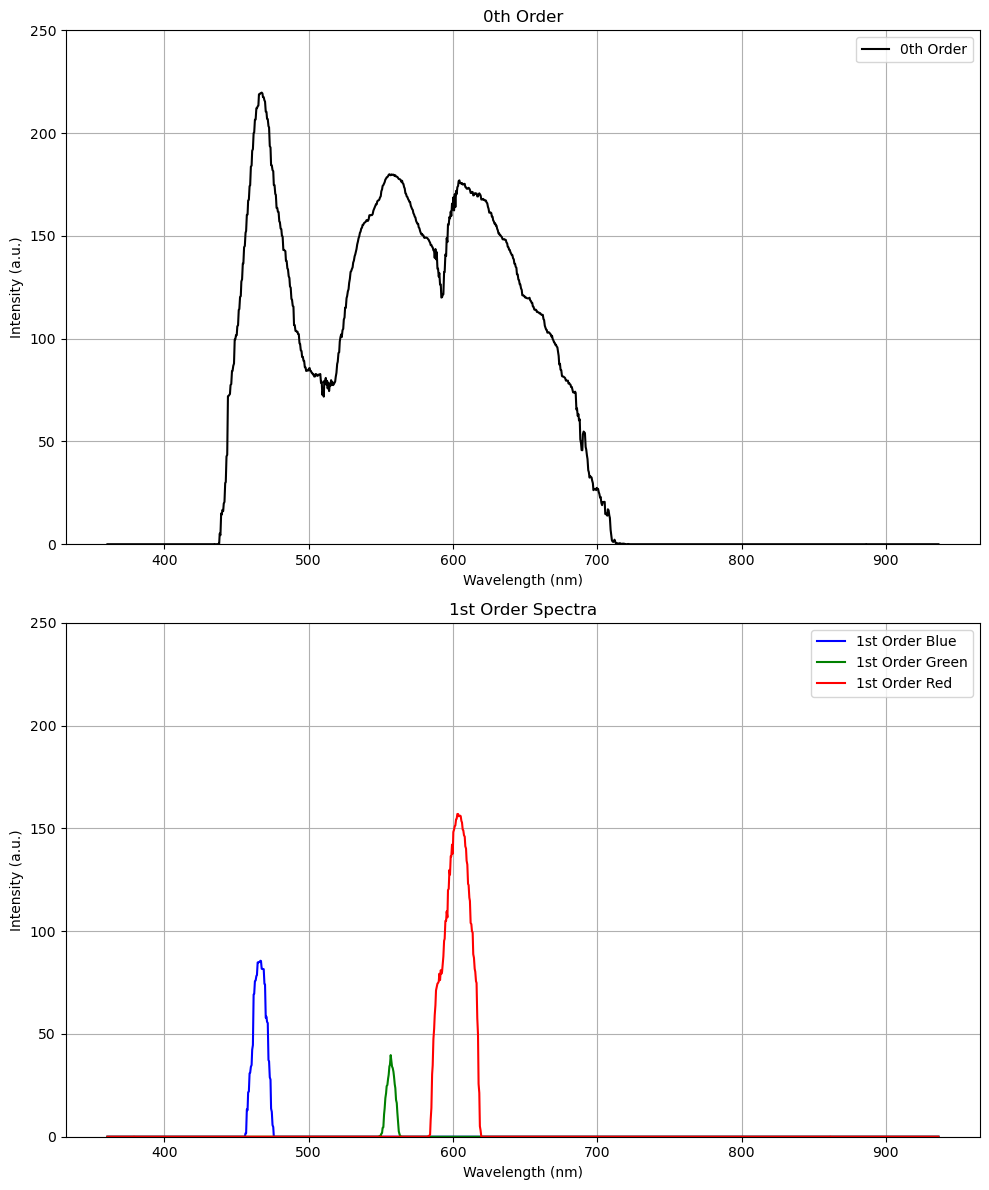

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Function definitions (read_data and find_max_intensity) remain the same

# Function to plot on a single subplot
def plot_on_subplot(ax, wavelength, intensity, title, color):
    ax.plot(wavelength, intensity, label=title, color=color)
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity (a.u.)')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 250)  # Keeping the y-axis range consistent

# Main function for rearranged subplots
def main():
    filepath = r'C:\Users\frnegasa\OneDrive - University of Eastern Finland\classes\Photonics Laboratory\1 Kinegram\exp_data\\'
    filenames = [
        'P-0th-order-25-degrees-001.txt',
        'P-1st-order-47-degrees-blue-001.txt',
        'P-1st-order-51-degrees-Green-001.txt',
        'P-1st-order-53-degrees-Yellowish-001.txt'
    ]
    titles = ['0th Order', '1st Order Blue', '1st Order Green', '1st Order Red']
    colors = ['black', 'blue', 'green', 'red']  # Colors corresponding to each plot

    # Creating a figure with (2, 1) subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot the first figure in the first subplot
    wavelength, intensity = read_data(os.path.join(filepath, filenames[0]))
    plot_on_subplot(axs[0], wavelength, intensity, titles[0], colors[0])
    axs[0].set_title(titles[0])

    # Plot the blue, green, and red on the same subplot
    for filename, title, color in zip(filenames[1:], titles[1:], colors[1:]):
        wavelength, intensity = read_data(os.path.join(filepath, filename))
        plot_on_subplot(axs[1], wavelength, intensity, title, color)
    axs[1].set_title('1st Order Spectra')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


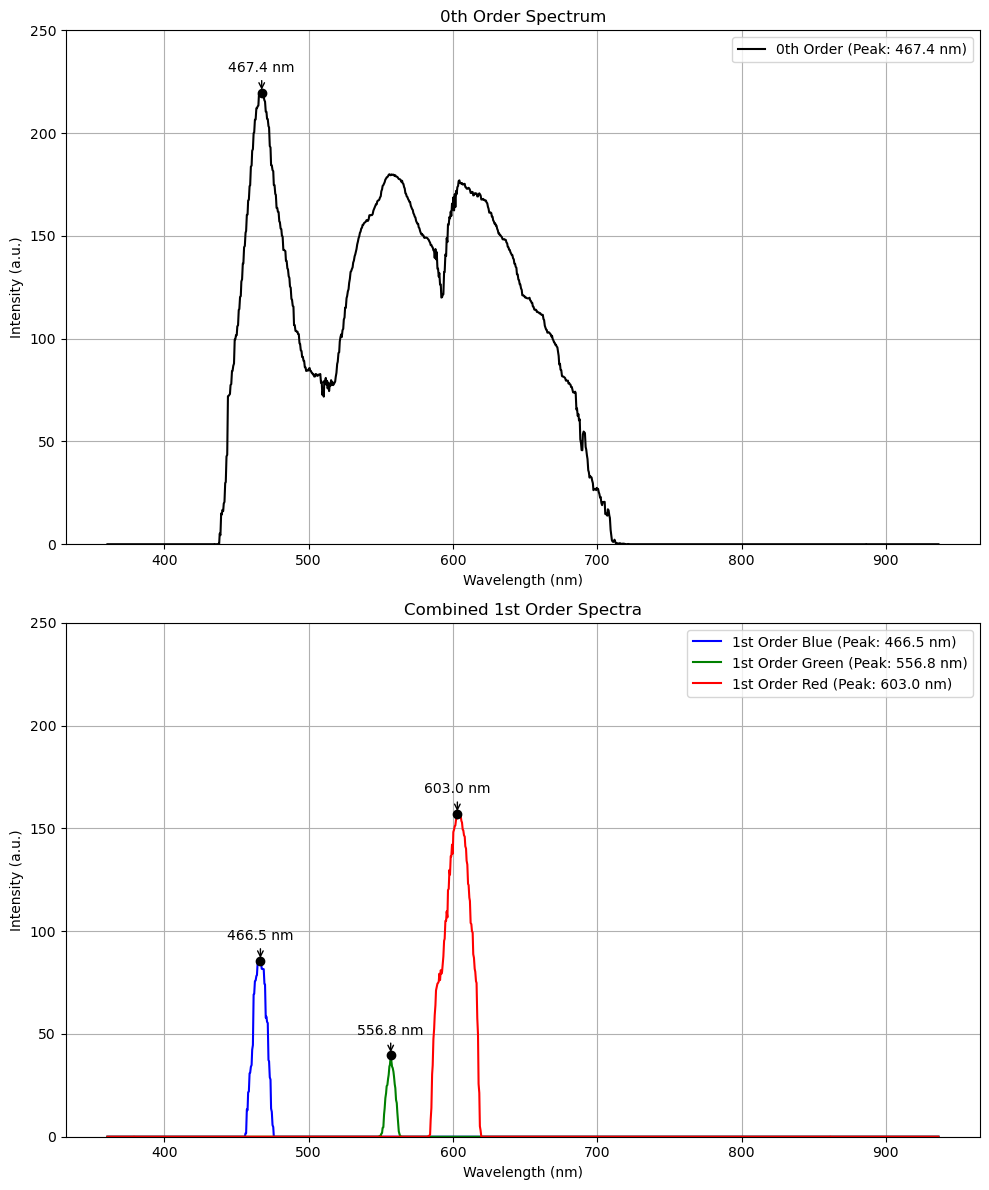

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Assumes the read_data and find_max_intensity functions are defined as before

# Updated function to plot on a single subplot and annotate peak wavelength
def plot_on_subplot(ax, wavelength, intensity, title, color):
    max_wavelength, max_intensity = find_max_intensity(wavelength, intensity)  # Find peak
    ax.plot(wavelength, intensity, label=f'{title} (Peak: {max_wavelength} nm)', color=color)
    ax.scatter(max_wavelength, max_intensity, color='black', zorder=5)  # Mark the peak point
    ax.annotate(f'{max_wavelength} nm',  # Annotate the peak wavelength
                xy=(max_wavelength, max_intensity), 
                xytext=(max_wavelength, max_intensity + 10),  # Adjust text position above the peak
                textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                horizontalalignment='center')
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity (a.u.)')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 250)  # Fixed y-axis range

# Main function for rearranged subplots with peak wavelength annotations
def main():
    filepath = r'C:\Users\frnegasa\OneDrive - University of Eastern Finland\classes\Photonics Laboratory\1 Kinegram\exp_data\'
    filenames = [
        'P-0th-order-25-degrees-001.txt',
        'P-1st-order-47-degrees-blue-001.txt',
        'P-1st-order-51-degrees-Green-001.txt',
        'P-1st-order-53-degrees-Yellowish-001.txt'
    ]
    titles = ['0th Order', '1st Order Blue', '1st Order Green', '1st Order Red']
    colors = ['black', 'blue', 'green', 'red']  # Colors corresponding to each plot

    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot the 0th Order in the first subplot
    wavelength, intensity = read_data(os.path.join(filepath, filenames[0]))
    plot_on_subplot(axs[0], wavelength, intensity, titles[0], colors[0])
    axs[0].set_title('0th Order Spectrum')

    # Combine the 1st Order Blue, Green, Red plots in the second subplot
    for filename, title, color in zip(filenames[1:], titles[1:], colors[1:]):
        wavelength, intensity = read_data(os.path.join(filepath, filename))
        plot_on_subplot(axs[1], wavelength, intensity, title, color)
    axs[1].set_title('Combined 1st Order Spectra')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
def plot_on_subplot(ax, wavelength, intensity, title, color):
    max_wavelength, max_intensity = find_max_intensity(wavelength, intensity)  # Find peak
    ax.plot(wavelength, intensity, label=f'{title} (Peak: {max_wavelength} nm)', color=color)
    ax.scatter(max_wavelength, max_intensity, color='black', zorder=5)  # Mark the peak point
    
    # Calculate Half Maximum
    half_max_intensity = max_intensity / 2

    # Find points where the intensity crosses the half maximum
    # The np.where condition will give indices where the condition is True
    # We find the first point before the peak and the first after to calculate FWHM
    cross_points = np.where(intensity >= half_max_intensity)[0]  # Indices where condition is met
    lower_index = cross_points[cross_points < np.argmax(intensity)].max()
    upper_index = cross_points[cross_points > np.argmax(intensity)].min()

    fwhm = wavelength[upper_index] - wavelength[lower_index]
    
    # Annotate the FWHM on the plot
    ax.annotate(f'FWHM: {fwhm:.2f} nm', xy=(max_wavelength, max_intensity), 
                xytext=(0, 40), textcoords='offset points',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                horizontalalignment='center')
    
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity (a.u.)')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 250)  # Fixed y-axis range

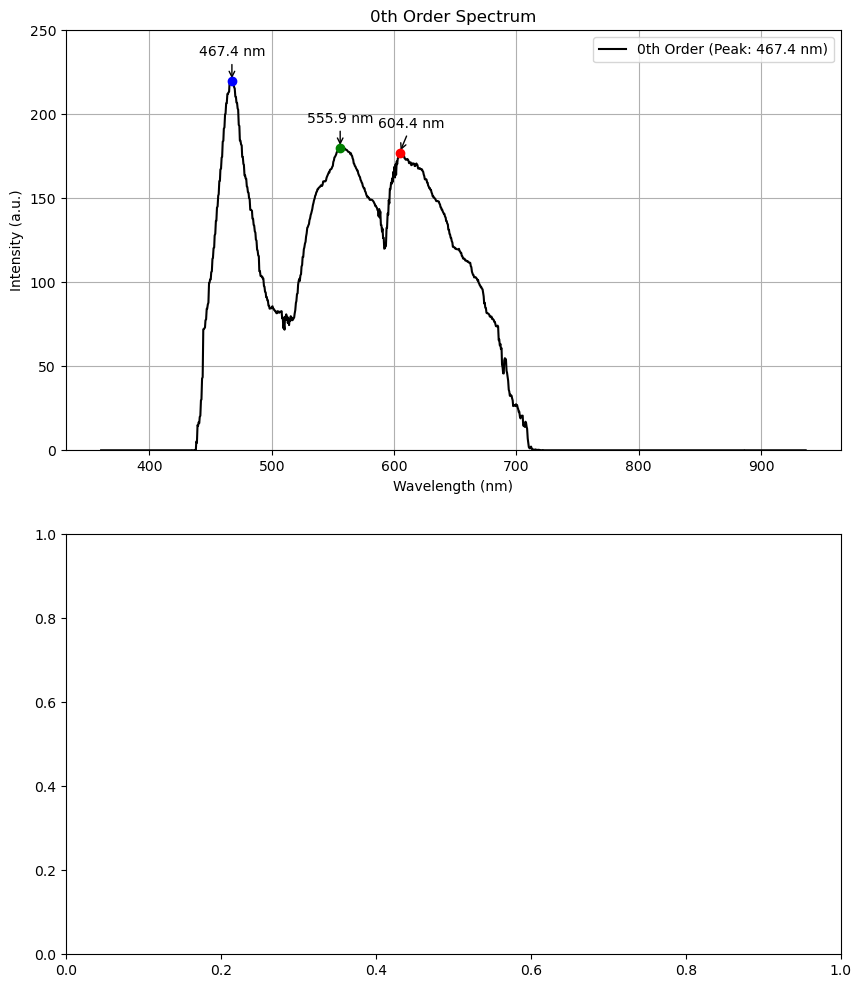

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Assumes the read_data and find_max_intensity functions are defined as before

def find_intensity_at_wavelength(wavelength, intensity, target_wavelength):
    """
    Interpolates intensity at the given target wavelength using linear interpolation.
    
    Parameters:
        wavelength (array-like): Array of wavelengths.
        intensity (array-like): Array of corresponding intensity values.
        target_wavelength (float): Target wavelength to find intensity for.
    
    Returns:
        float: Interpolated intensity value at the target wavelength.
    """
    # Ensure the target wavelength is within the range of available data
    if target_wavelength < min(wavelength) or target_wavelength > max(wavelength):
        raise ValueError("Target wavelength is outside the range of available data.")

    # Linear interpolation to estimate intensity at the target wavelength
    idx = np.abs(wavelength - target_wavelength).argmin()  # Find index of closest wavelength
    if wavelength[idx] == target_wavelength:
        return intensity[idx]  # Exact match, return intensity directly
    else:
        # Interpolate intensity using linear interpolation between neighboring points
        x1, x2 = wavelength[idx], wavelength[idx + 1]
        y1, y2 = intensity[idx], intensity[idx + 1]
        interpolated_intensity = y1 + (y2 - y1) * (target_wavelength - x1) / (x2 - x1)
        return interpolated_intensity


# Updated function to plot on a single subplot and annotate peak wavelength
def plot_on_subplot(ax, wavelength, intensity, title, color):
    max_wavelength, max_intensity = find_max_intensity(wavelength, intensity)  # Find peak
    ax.plot(wavelength, intensity, label=f'{title} (Peak: {max_wavelength} nm)', color=color)
    ax.scatter(max_wavelength, max_intensity, color='blue', zorder=5)  # Mark the peak point
    ax.annotate(f'{max_wavelength} nm',  # Annotate the peak wavelength
                xy=(max_wavelength, max_intensity), 
                xytext=(max_wavelength, max_intensity + 15),  # Adjust text position above the peak
                textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                horizontalalignment='center')
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity (a.u.)')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 250)  # Fixed y-axis range
    
    # Additional annotation for green peak
    green_peak_wavelength = 555.9  # Example wavelength for green peak
    green_peak_intensity = find_intensity_at_wavelength(wavelength, intensity, green_peak_wavelength)
    ax.scatter(green_peak_wavelength, green_peak_intensity, color='green', zorder=5)  # Mark the peak point
    ax.annotate(f'{green_peak_wavelength} nm',  # Annotate the peak wavelength Green Peak
                xy=(green_peak_wavelength, green_peak_intensity), 
                xytext=(green_peak_wavelength, green_peak_intensity + 15),  # Adjust text position below the peak
                textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                horizontalalignment='center')
    
    # Additional annotation for red peak
    red_peak_wavelength = 604.4  # Example wavelength for red peak
    red_peak_intensity = find_intensity_at_wavelength(wavelength, intensity, red_peak_wavelength)
    ax.scatter(red_peak_wavelength, red_peak_intensity, color='red', zorder=5)  # Mark the peak point
    ax.annotate(f'{red_peak_wavelength} nm',  # Annotate the peak wavelength Red Peak
                xy=(red_peak_wavelength, red_peak_intensity), 
                xytext=(red_peak_wavelength + 10, red_peak_intensity + 15),  # Adjust text position above the peak
                textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                horizontalalignment='center')



# Main function for rearranged subplots with peak wavelength annotations
def main():
    filepath = r'C:\Users\frnegasa\OneDrive - University of Eastern Finland\classes\Photonics Laboratory\1 Kinegram\exp_data\\'
    filenames = [
        'P-0th-order-25-degrees-001.txt',
        'P-1st-order-47-degrees-blue-001.txt',
        'P-1st-order-51-degrees-Green-001.txt',
        'P-1st-order-53-degrees-Yellowish-001.txt'
    ]
    titles = ['0th Order', '1st Order Blue', '1st Order Green', '1st Order Red']
    colors = ['black', 'blue', 'green', 'red']  # Colors corresponding to each plot

    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot the 0th Order in the first subplot
    wavelength, intensity = read_data(os.path.join(filepath, filenames[0]))
    plot_on_subplot(axs[0], wavelength, intensity, titles[0], colors[0])
    axs[0].set_title('0th Order Spectrum')

if __name__ == "__main__":
    main()
